In [548]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [549]:
data = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [550]:
print(data.head())
test.head()

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [551]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [552]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


array([[<AxesSubplot:title={'center':'ApplicantIncome'}>]], dtype=object)

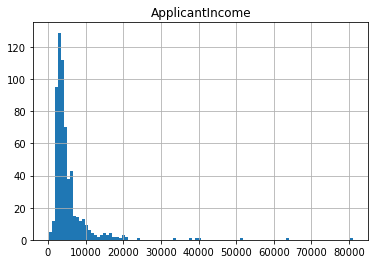

In [553]:
data.hist('ApplicantIncome', bins=100)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

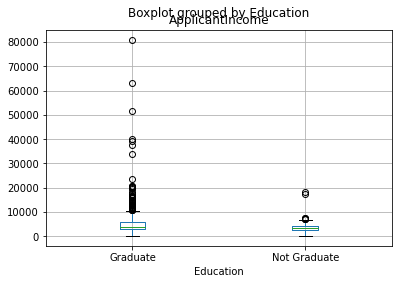

In [554]:
data.boxplot(column='ApplicantIncome', by='Education')

In [555]:
print(data.isnull().sum())
test.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [556]:
data.drop('Loan_ID', axis=1,inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [557]:
print(data['Credit_History'].mean())
data['Credit_History'].value_counts()

0.8421985815602837


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [558]:
data['Credit_History'].fillna(1.0, inplace=True)
data.fillna(data.mean(), inplace=True)
data.isnull().sum()
#data.tail()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [559]:
print(test['Credit_History'].mean())
test['Credit_History'].value_counts()

0.8254437869822485


1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [560]:
test['Credit_History'].fillna(1.0, inplace=True)
test.fillna(data.mean(), inplace=True)
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [561]:
var = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for i in var:
    data.fillna(data[i].value_counts().index[0], inplace=True)
    test.fillna(test[i].value_counts().index[0], inplace=True)
print(data.isnull().sum())
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [562]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ft = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for i in ft:
    data[i]=le.fit_transform(data[i])
    if(i!='Loan_Status'):
        test[i]=le.fit_transform(test[i])

In [563]:
data=np.array(data)
test=np.array(test)

In [564]:
X, y = data[:,0:11],  data[:,11]
X.shape

(614, 11)

In [565]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)

(411, 11) (203, 11)


In [566]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rX_train = scaler.fit_transform(X_train)
rX_test = scaler.transform(X_test)

In [567]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(rX_train,y_train)

from sklearn.ensemble import RandomForestClassifier 
classifier= RandomForestClassifier(n_estimators= 500, random_state=4)
classifier.fit(rX_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=4)

In [568]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(rX_test)
print("Accuracy of logistic regression classifier: ", logreg.score(rX_test, y_test))

Accuracy of logistic regression classifier:  0.7980295566502463


In [569]:
pred= classifier.predict(rX_test)
from sklearn import metrics as m
acc= m.accuracy_score(y_test,pred)
print("Accuracy of Random forest classifier: ",acc) 

Accuracy of Random forest classifier:  0.8029556650246306


In [570]:
testX = test[:, 1:]
print(testX.shape)
test_predictions = classifier.predict(testX)
#test_predictions

(367, 11)


In [571]:
test = pd.DataFrame(test, columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'])
test.insert(12, 'Loan_Status', test_predictions, True)

In [572]:
test['Loan_Status'] = test['Loan_Status'].astype(np.int64)

In [573]:
test = test.drop(['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'], axis=1)

In [574]:
test['Loan_Status']= test['Loan_Status'].map({0:'N',1:'Y'})

In [575]:
test.to_csv('sample_submission.csv',index= False)